REG NO : 20MAI0015

PROBLEM STATEMENT :  Design either a KNN or RandomForest or an SVM for a Dataset from UCI (University of California, Irvine) Repository. Organise your implementation as a sequence of steps. Include Comments. Provide the link to the dataset. Give a short
 insight on data. Establish the accuracy of the model.

LINK TO THE DATASET : https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

DATASET DESCRIPTION

Contains bank client data

1. Age (numeric)
2. Job : type of job (categorical)
3. Marital : marital status (categorical)
4. 4Education (categorical)
5. Default: has credit in default? (categorical)
6. Housing: has housing loan? (categorical)
7. Loan: has personal loan? (categorical)
8. Contact (categorical)
9. Month: last contact month of year (categorical)
10. Dayofweek: last contact day of the week (categorical)
11. Duration: last contact duration, in seconds (numeric)
12. Campaign: number of days (numeric)
13. Pdays: number of days (numeric)
14. Previous: number of contacts performed (numeric)
15. Poutcome: outcome of the previous marketing campaign (categorical)
16.  y - Target variable

In [47]:
#Importing the required datasets
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


['bank-additional-names.txt', 'bank-additional-full.csv']


In [82]:
data = pd.read_csv('../input/bank-additional-full.csv',sep=';') # note that the delimiter for this dataset is ";"
data = data.drop('duration',axis=1) # as recommended by the dataset description, we will drop the last contact duration values.
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


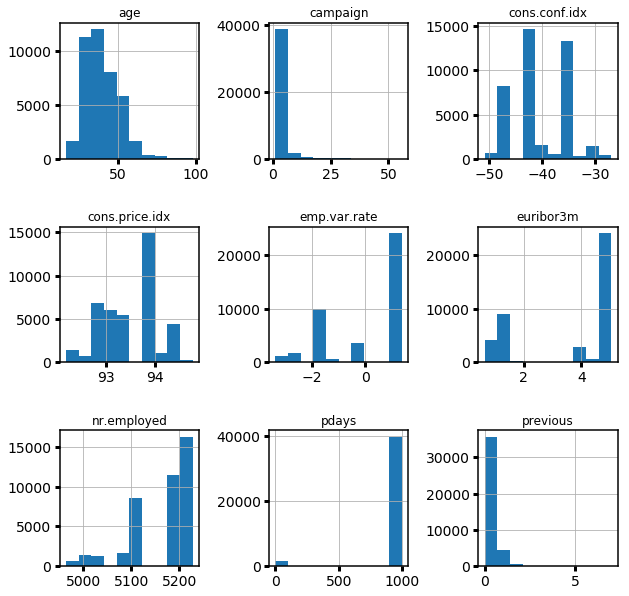

In [83]:
#To look at the distribution of the variables
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
# Visualizing the distribution
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [84]:
#Assigning the numeric values for poutcome
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
#Assigning the numeric values for default
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
#Assigning the numeric values for housing
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
#Assigning the numeric values for loan
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [86]:
nominal = ['job','marital','education','contact','month','day_of_week']
#neutralizing the dummies
dataProcessed = pd.get_dummies(data,columns=nominal)

In [87]:
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,0,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,1,-1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,1,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,1,1,-1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
#Train test and split the data
X = dataProcessed.drop('y', axis=1).values
y = dataProcessed['y'].values
# split, random_state is used for repeatable results, you should remove it if you are running your own code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#to know the sizes of the variables
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (28831, 54)
y train size:  (28831,)
X test size:  (12357, 54)
y test size:  (12357,)


Before the training starts, standardize the *numeric* variables in the training set:

In [90]:
# column index of numeric variables
idx_numeric=[0,4,5,6,8,9,10,11,12]

# standardize numeric variables only
scaler = StandardScaler()
X_train[:,idx_numeric]=scaler.fit_transform(X_train[:,idx_numeric])
X_test[:,idx_numeric]=scaler.transform(X_test[:,idx_numeric])

In [91]:
from sklearn.model_selection import GridSearchCV

GridSearchCV is a function that comes in Scikit-learn's(or SK-learn) model_selection package.So an important point here to note is that we need to have Scikit-learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set

In [92]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],'C': [1]},{'kernel': ['linear'], 'C': [1]}]
#SVM Handled by SVC
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]}, {'kernel': ['linear'], 'C': [1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [93]:
print(clf.cv_results_)

{'mean_fit_time': array([ 81.65591598, 199.85996251]), 'std_fit_time': array([13.67204021, 11.8658375 ]), 'mean_score_time': array([5.33474722, 3.08142314]), 'std_score_time': array([0.02164594, 1.01727236]), 'param_C': masked_array(data=[1, 1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, --],
             mask=[False,  True],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}], 'split0_test_score': array([0.66044776, 0.64186047]), 'split1_test_score': array([0.64081633, 0.61320755]), 'split2_test_score': array([0.66396761, 0.64878049]), 'split3_test_score': array([0.68325792, 0.65128205]), 'split4_test_score': array([0.69731801, 0.67924528]), 'mean_test_score': array([0.66916122, 0.64687499]), 

In [94]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.6691612228191874


In [95]:
from sklearn.metrics import precision_score, accuracy_score

In [97]:
#Accuracy and precision
y_true, y_pred = y_test, clf.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

precision on the evaluation set:  0.647834274952919
accuracy on the evaluation set:  0.9002994254268836
